In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/Users/maximbortnik/Downloads/heart.csv.xls")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [14]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Есть подозрение на выбросы в признаке *chol*, так как максимальное значение 564 сильно превышает 75-й перцентиль (274.5)

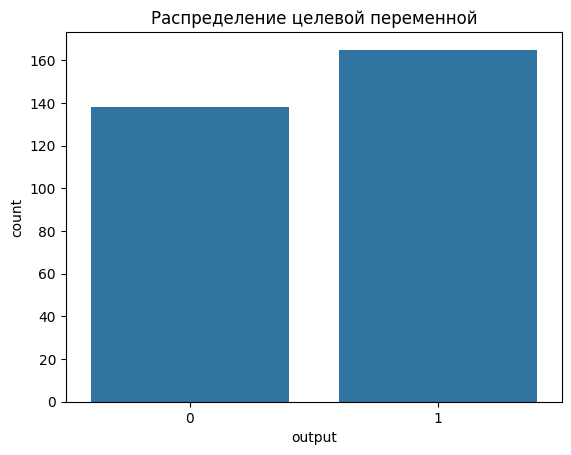

In [26]:
sns.countplot(x='output', data=df)
plt.title('Распределение целевой переменной')
plt.show()

In [ ]:
# fig, axes = plt.subplots(len(df.columns), 1, figsize=(20, 5 * len(df.columns)))  
# axes = axes.flatten()

# for i, column in enumerate(df.columns):
#     sns.countplot(df, x=column, ax=axes[i], palette="husl") 
#     axes[i].set_title(f"{column}", fontsize=14)
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# plt.tight_layout()
# plt.show()

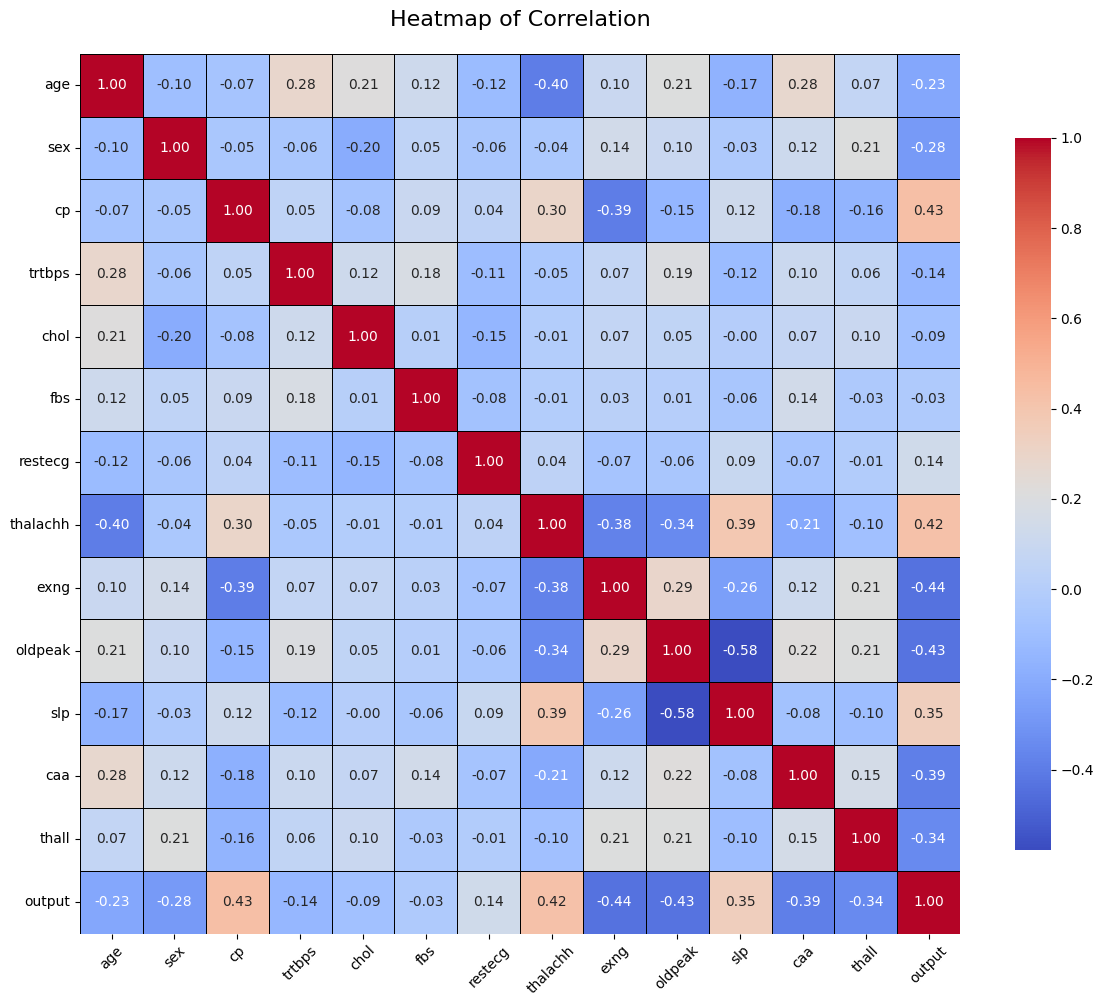

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    square=True,         
    cbar_kws={"shrink": 0.8},  
    linewidths=0.5,      
    linecolor='black'    
)
plt.title("Heatmap of Correlation", fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



1)cp(Chest Pain type) положительно коррелирует с целевой переменной(0.43)

2)thalachh(maximum heart rate achieved) положительно коррелирует с целевой переменной(0.42)

3)exng(exercise induced angina) отрицательно коррелирует с целевой переменной(-0.44)

4)Низкая корреляция между переменными *oldpeak* и *slp* может указывать на возможную мультиколлинеарность(-0.58)

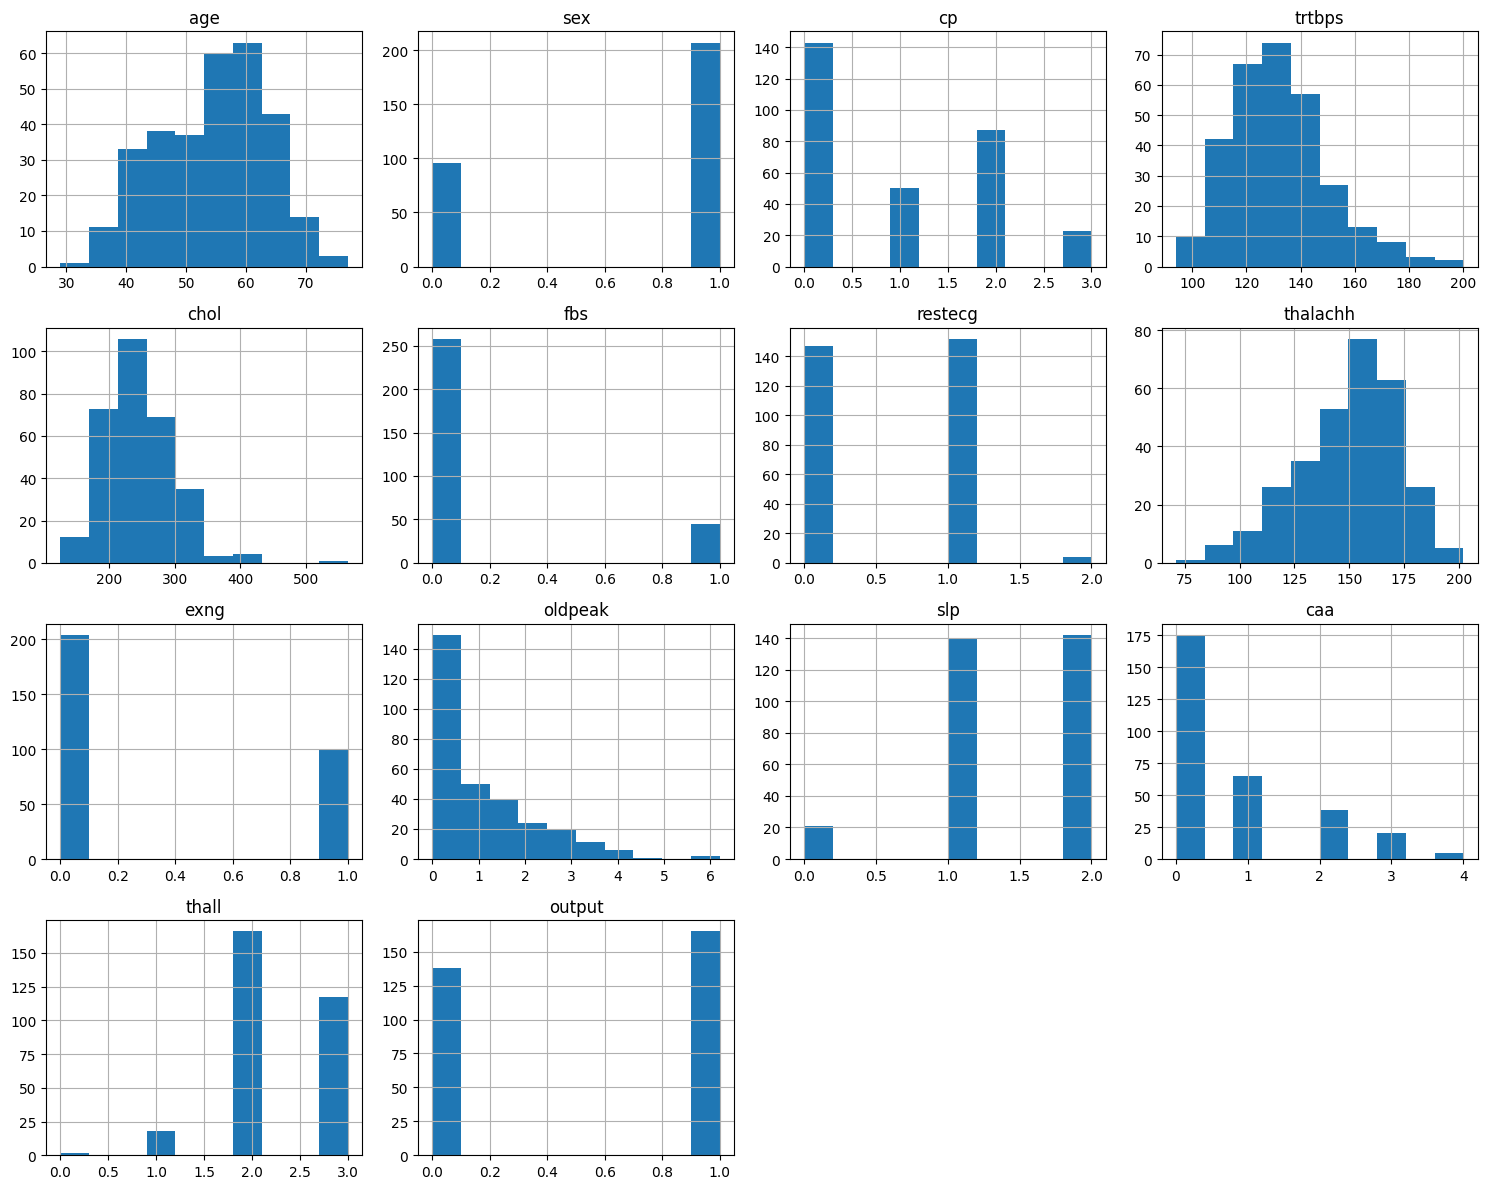

In [29]:
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()


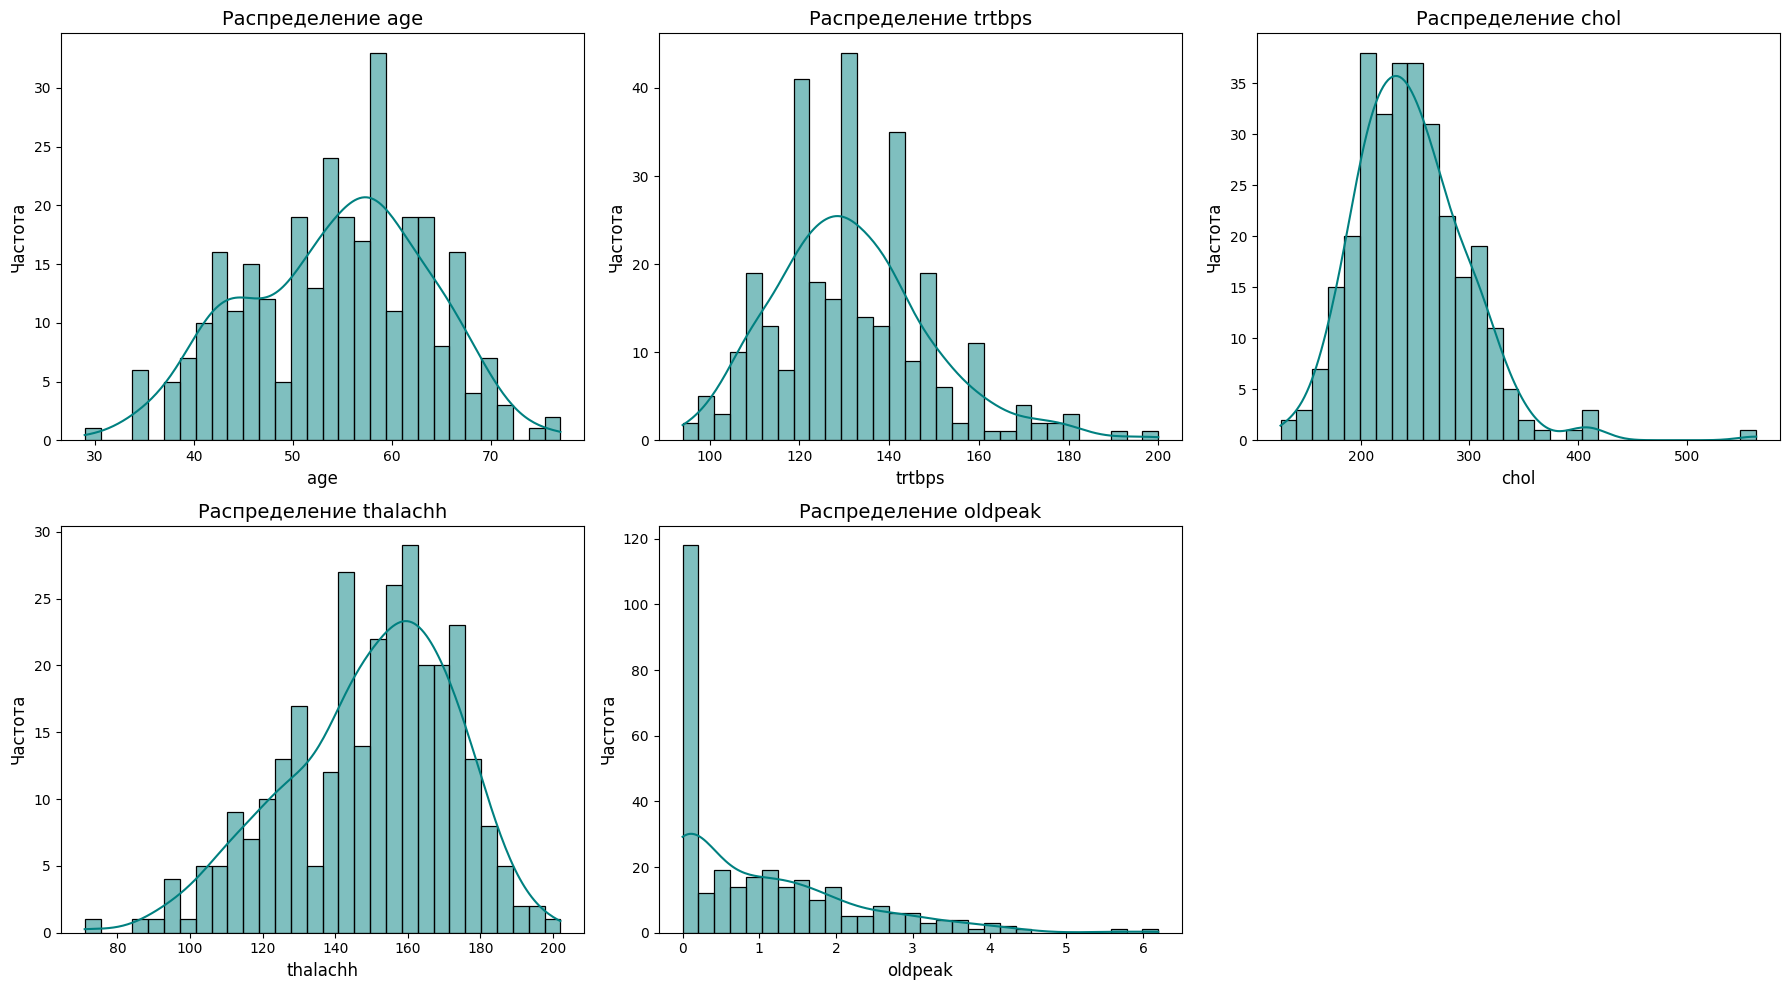

In [34]:
key_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, feature in enumerate(key_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], color="teal")
    axes[i].set_title(f"Распределение {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Частота", fontsize=12)
axes[-1].set_visible(False) 
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop("output", axis=1)
y = df["output"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
   
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results[model_name] = {
        "classification_report": report,
        "roc_auc": roc_auc
    }


summary = []
for model_name, metrics in results.items():
    summary.append({
        "Model": model_name,
        "Precision": metrics["classification_report"]["weighted avg"]["precision"],
        "Recall": metrics["classification_report"]["weighted avg"]["recall"],
        "F1-Score": metrics["classification_report"]["weighted avg"]["f1-score"],
        "ROC AUC": metrics["roc_auc"]
})

summary_df = pd.DataFrame(summary)
summary_df

,Model,Precision,Recall,F1-Score,ROC AUC
0,KNN,0.812564,0.803279,0.799672,0.862013
1,Logistic Regression,0.812564,0.803279,0.799672,0.869048
2,Random Forest,0.858297,0.836066,0.831266,0.911255
3,Gradient Boosting,0.826237,0.819672,0.817182,0.878788


Лучшая модель по метрике Precision - **Random Forest**

Лучшая модель по метрике Recall - **Random Forest**

Лучшая модель по метрике F1-Score - **Random Forest**	

Лучшая модель по метрике ROC AUC - **Random Forest**



****Гиперпараметры****

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

param_grid = {
    "n_estimators": [100, 200, 300],           
    "criterion": ["gini", "entropy", "log_loss"], 
    "max_depth": [None, 10, 20, 30],          
    "min_samples_split": [2, 5, 10],          
    "min_samples_leaf": [1, 2, 4],            
    "max_features": ["sqrt", "log2"],         
    "bootstrap": [True, False]               
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  
    param_grid=param_grid,                    
    scoring="roc_auc",                        
    cv=5,                                     
    n_jobs=-1,                                
    verbose=2                                 
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
print("Лучшие параметры:", best_params)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Отчет классификации:")
print(classification_report(y_test, y_pred))
print("ROC AUC на тестовой выборке:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bo

/Users/maximbortnik/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

param_grid = {
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1",  
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
print("Лучшие параметры:", best_params)

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Отчет классификации:")
print(classification_report(y_test, y_pred))
print(f"F1-Score на тестовой выборке: {f1:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END boo

In [82]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Метрики качества модели:")
print(f"- F1-Score: {f1:.4f}")
print(f"- Recall : {recall:.4f}")
print(f"- ROC AUC: {roc_auc:.4f}")


Метрики качества модели:
- Accuracy : 0.8197
- F1-Score: 0.8533
- Recall : 0.9697
- Precision : 0.7619
- ROC AUC: 0.9113
